Rede que compara dígitos feitos à mão<br/>
Utiliza tensorflow 2.0  e Keras (Functional API) para montar a rede<br/>
com dois inputs (duas figuras que serão comparadas) no modelo combinado.

In [1]:
import tensorflow as tf
import numpy as np
import random
tf.__version__

'2.3.0'

In [2]:
from keras.datasets import mnist
#download mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#check image shape
X_train[0].shape

(28, 28)

In [4]:
#reshape data 
X_train = X_train.reshape(60000,784)
X_train[0].shape

(784,)

In [5]:
random.seed(51)
tf.random.set_seed(51)

Criar dataset X1 e X2....50% (pares iguais de imagens) iguais e 50% diferentes<br/> (pares de imagens diferentes)


In [6]:
lind=[]
for i in range(10):
  lind.append([j for j in range(len(y_train)) if y_train[j]==i])

In [9]:
lindi=[]
for i in range(10000):
  k=random.randint(0,9)
  tam=len(lind[k])
  p1=random.randint(0,tam-1)
  p2=random.randint(0,tam-1)
  lindi.append((lind[k][p1],lind[k][p2]))


In [7]:
lindf=[]
for i in range(10000):
  k1,k2=0,0
  while k1==k2:
    k1=random.randint(0,9)
    k2=random.randint(0,9)

  tam1=len(lind[k1])
  tam2=len(lind[k2])
  p1=random.randint(0,tam1-1)
  p2=random.randint(0,tam2-1)
  lindf.append((lind[k1][p1],lind[k2][p2]))

In [10]:
X1,X2=[],[]
for i in range(len(lindi)):
  X1.append(X_train[lindi[i][0]])
  X2.append(X_train[lindi[i][1]])
for i in range(len(lindf)):
  X1.append(X_train[lindf[i][0]])
  X2.append(X_train[lindf[i][1]])
X1=np.array(X1)
X2=np.array(X2)

In [11]:
#montagem do target do modelo combinado
y=[1]*10000+[0]*10000
y=np.array(y)


In [12]:
#embaralhando o dataset
l=[i for i in range(20000)]
l=random.choices(l,k=20000)

In [13]:
X1e=[]
X2e=[]
ye=[]
for ind in l:
  X1e.append(X1[ind])
  X2e.append(X2[ind])
  ye.append(y[ind])
X1e=np.array(X1e)
X2e=np.array(X2e)
ye=np.array(ye)

In [14]:
inp1=tf.keras.Input((784,))
inp2=tf.keras.Input((784,))

In [15]:
#modelo da entrada 1
o1m1=tf.keras.layers.Dense(200, activation='sigmoid')(inp1)
o2m1=tf.keras.layers.Dense(100, activation='sigmoid')(o1m1)


In [16]:
#modelo da entrada 2
o1m2=tf.keras.layers.Dense(200, activation='sigmoid')(inp2)
o2m2=tf.keras.layers.Dense(100, activation='sigmoid')(o1m2)


In [17]:
#modelo combinado
combined = tf.concat([o2m1, o2m2],axis=1)
of1 = tf.keras.layers.Dense(20, activation='relu')(combined)
of2 = tf.keras.layers.Dense(1, activation='sigmoid')(of1)
model = tf.keras.Model(inputs=[inp1,inp2], outputs=of2)

In [18]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 200)          157000      input_2[0][0]                    
_______________________________________________________________________________________

In [19]:
#compile model using accuracy to measure model performance
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
#train the model
hist=model.fit([X1e,X2e], ye,validation_split=0.2,epochs=50)

Epoch 1/50
500/500 [==============================] - 2s 5ms/step - loss: 0.7022 - accuracy: 0.5036 - val_loss: 0.6937 - val_accuracy: 0.5055
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 0.6804 - accuracy: 0.5355 - val_loss: 0.6465 - val_accuracy: 0.5838
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.6172 - accuracy: 0.6213 - val_loss: 0.5991 - val_accuracy: 0.6457
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.5675 - accuracy: 0.6833 - val_loss: 0.5571 - val_accuracy: 0.7005
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.5295 - accuracy: 0.7194 - val_loss: 0.5233 - val_accuracy: 0.7355
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.5019 - accuracy: 0.7460 - val_loss: 0.4989 - val_accuracy: 0.7415
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 0.4817 - accuracy: 0.7567 - val_loss: 0.4840 - val_accuracy: 0.7575
Epoch 

In [26]:
#teste com par de imagens diferentes
print(model.predict([np.array([X_train[0]]),np.array([X_train[1]])]))
#teste com par de imagens iguais
print(model.predict([np.array([X_train[8896]]),np.array([X_train[8897]])]))

[[0.00180862]]
[[0.99727976]]


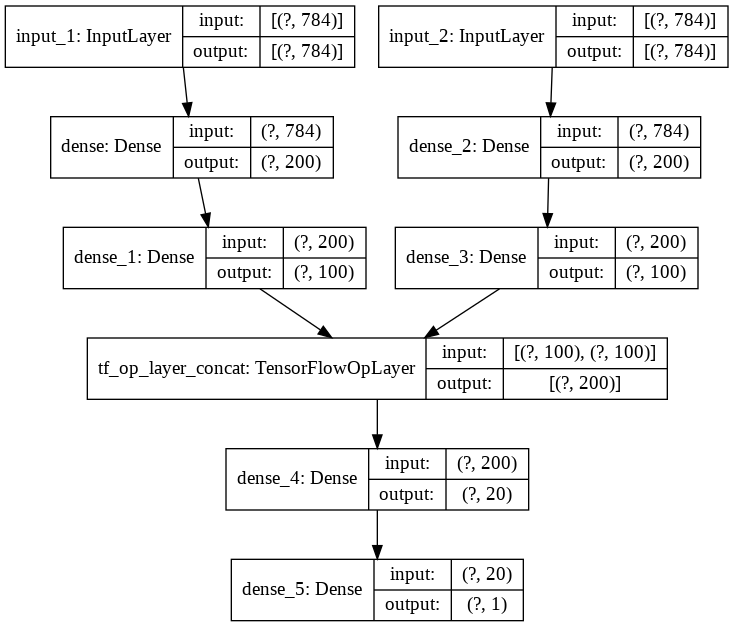

In [22]:
dot_img_file = '/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)